# Synthetic Data

In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

filename = "../data/femnist/compressed/iid_vgg/training.parquet"
df = pd.read_parquet(filename)
df

,y,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_4086,x_4087,x_4088,x_4089,x_4090,x_4091,x_4092,x_4093,x_4094,x_4095
user,,,,,,,,,,,,,,,,,,,,,
3297,6,-0.128890,0.173911,0.419221,-0.727016,-0.299616,0.675596,0.610407,-0.361724,0.408060,...,0.338041,0.237507,-0.344758,0.229402,-1.085741,-0.433503,2.393855e-07,-0.177349,-0.638890,-0.011029
3297,5,-0.225933,0.455644,0.756297,-0.486792,-0.698764,0.394224,0.767844,-0.262736,0.487188,...,0.373132,0.560332,-0.186852,0.269421,-1.513358,-0.431682,1.220164e-07,-0.469783,-0.990410,0.281288
3297,0,-0.448277,0.345125,0.524995,-0.326162,-0.454362,0.012110,0.846554,-0.114780,0.429343,...,0.071047,0.333560,-0.029380,0.216826,-0.713988,-0.437678,2.032057e-07,-0.428285,-0.208404,0.695035
3297,0,-0.099914,-0.002287,0.557689,-0.162973,-0.111826,0.447094,0.692012,0.018105,0.379638,...,0.269023,0.346425,0.048354,0.203529,-0.299741,-0.127380,2.835633e-07,0.201465,0.073021,0.200143
3297,2,-0.078496,0.745668,0.459139,-1.217975,-0.008267,0.016558,0.872563,-0.499448,0.463783,...,-0.042701,0.231573,0.097380,0.281453,-1.138396,0.146864,2.461218e-07,0.288967,-1.085549,0.127850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,0,0.468579,0.177798,0.267748,-0.057723,-0.056557,0.463001,0.195149,-0.024963,0.456664,...,0.361106,0.440443,0.036904,0.187945,-0.184909,0.218870,2.448862e-07,0.389772,0.109338,0.193327
2199,47,0.346613,0.675631,0.632938,-0.269215,0.025445,0.858298,0.667775,-0.233528,0.506351,...,0.365908,0.300761,-0.166768,0.238610,-1.396573,0.384459,5.910238e-08,0.112650,-0.977537,0.094893
2199,5,-0.532746,0.146662,0.965288,-1.011400,-0.540791,0.368271,1.297223,-0.944705,0.523707,...,0.303274,0.117014,0.027401,0.263190,-1.734492,-0.027866,2.916100e-07,-0.137855,-1.435404,0.515957


In [3]:
def get_x_tensor(x: np.ndarray) -> torch.Tensor:
    x = torch.tensor(np.expand_dims(x, axis=1), dtype=torch.float32)
    ones = torch.unsqueeze(torch.ones(x.shape[0]), 1)
    return torch.cat((ones, x), dim=-1)

def get_numpy_array(x: torch.Tensor) -> np.ndarray:
    return x[:, -1].flatten().numpy()

Syntethic dataset generation

In [4]:
x = np.array([-5, -4, 4, 5])
X = get_x_tensor(x=x)
Y = torch.tensor([[-10, -10, 5, 5]], dtype=torch.float32).T
y = get_numpy_array(Y)
X, Y

(tensor([[ 1., -5.],
         [ 1., -4.],
         [ 1.,  4.],
         [ 1.,  5.]]),
 tensor([[-10.],
         [-10.],
         [  5.],
         [  5.]]))

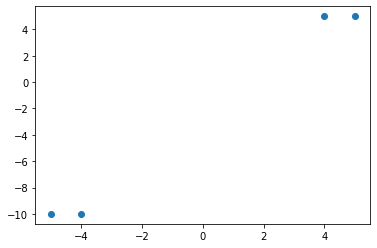

In [5]:
plt.scatter(x=x, y=y)
plt.show()

Closed form solution (under invertibility hypothesis, which is not necessary if we add an L2 regularization term)

In [6]:
XTX = X.T @ X
XTY = X.T @ Y
B = torch.linalg.solve(XTX, XTY)
B

tensor([[-2.5000],
        [ 1.6463]])

In [7]:
X @ B

tensor([[-10.7317],
        [ -9.0854],
        [  4.0854],
        [  5.7317]])

In [8]:
def plot_B(B, x, y, split=True):
    xs = np.linspace(-5, 5, 10_000)
    XS = get_x_tensor(xs)
    YS = XS @ B
    ys = get_numpy_array(YS)
    plt.plot(xs, ys)
    if split == True:
        plt.scatter(x[:2], y[:2], c='r')
        plt.scatter(x[2:], y[2:], c='g')
    else:
        plt.scatter(x, y, c='orange')
    plt.show()

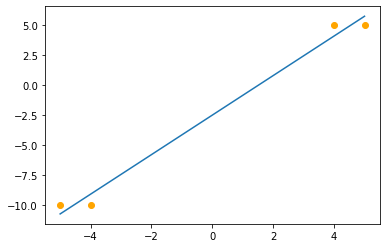

In [9]:
plot_B(B, x, y, split=False)

Suppose we have 2 clients, one with the first two points and one with the last two, let's try averaging the two closed form solutions of the clients

In [10]:
X1, X2 = X[:2], X[2:]
Y1, Y2 = Y[:2], Y[2:]

In [11]:
XTX1 = X1.T @ X1
XTY1 = X1.T @ Y1
B1 = torch.linalg.solve(XTX1, XTY1)

XTX2 = X2.T @ X2
XTY2 = X2.T @ Y2
B2 = torch.linalg.solve(XTX2, XTY2)

B1, B2

(tensor([[-1.0000e+01],
         [-7.3281e-06]]),
 tensor([[ 5.0000e+00],
         [-3.6640e-06]]))

In [12]:
X @ B1, X @ B2

(tensor([[-10.0000],
         [-10.0000],
         [-10.0001],
         [-10.0001]]),
 tensor([[5.0000],
         [5.0000],
         [5.0000],
         [5.0000]]))

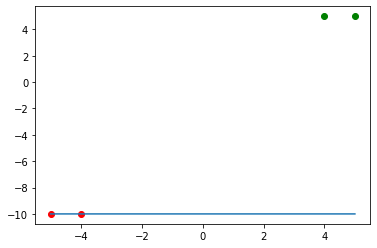

In [13]:
plot_B(B1, x, y)

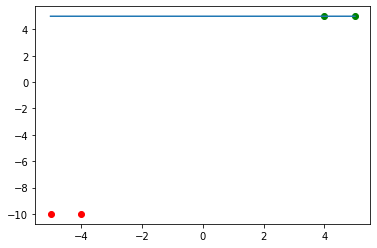

In [14]:
plot_B(B2, x, y)

In [15]:
B = B1 + B2 / 2
X @ B

tensor([[-7.5000],
        [-7.5000],
        [-7.5001],
        [-7.5001]])

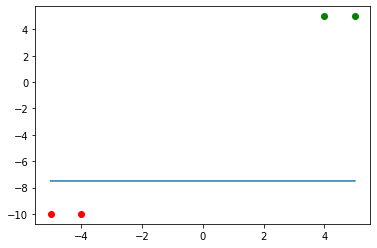

In [16]:
plot_B(B, x, y)

Same thing but we use the additive property of the two matrices involved (XTX and XTY)

In [17]:
XTX = X[:2].T @ X[:2] + X[2:].T @ X[2:]
XTY = X[:2].T @ Y[:2] + X[2:].T @ Y[2:]
B = torch.linalg.solve(XTX, XTY)
B

tensor([[-2.5000],
        [ 1.6463]])

In [18]:
X @ B

tensor([[-10.7317],
        [ -9.0854],
        [  4.0854],
        [  5.7317]])

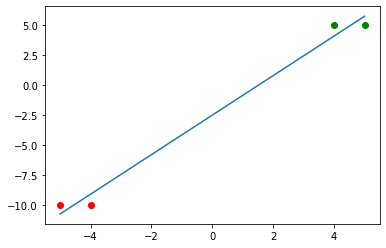

In [19]:
plot_B(B, x, y)

# Real Data

In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

from datasets.femnist import Femnist, Transformed_Femnist
from models.ridge_classifier import RidgeClassifier
from feature_extractors.vgg_19_bn import VGG_19_BN
from feature_extractors.rocket2d import Rocket2D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, Dataset, TensorDataset
import pandas as pd
import torch.nn as nn
import random
from sklearn.decomposition import PCA
import pyarrow.parquet as pq
from tqdm import tqdm

In [3]:
MAX_LENGTH = 20_000
#torch.set_default_dtype(torch.float64)
dtype = torch.float32

In [3]:
filename = "../data/femnist/compressed/iid/training.parquet"
df = pd.read_parquet(filename)
df.reset_index(inplace=True)
ds = Femnist(df, dtype=dtype)
dl = DataLoader(ds, batch_size=MAX_LENGTH)
x, y = next(iter(dl))

from sklearn.linear_model import RidgeClassifier as RC

x = torch.flatten(x, start_dim=1)
x = x.numpy()
y = y.numpy()

clf = RC(alpha=1)
clf.fit(x, y)
clf.score(x, y)

0.5028

In [3]:
def transform_dataset(transformer: nn.Module, dl: DataLoader, desc:str = "Progress", device: str = 'cpu') -> TensorDataset:
    progress_bar = tqdm(total=len(dl))
    progress_bar.set_description(desc)
    lx = []
    ly = []
    for xb, yb in dl:
        xb = xb.to(device=device)
        xb_t = transformer(xb)
        lx.append(xb_t.to("cpu"))
        ly.append(yb.to("cpu"))
        progress_bar.update(1)
    progress_bar.close()
    return TensorDataset(torch.cat(lx), torch.cat(ly))

In [24]:
filename = "../data/femnist/compressed/iid/training.parquet"
df = pd.read_parquet(filename)
df.reset_index(inplace=True)
df = df[:MAX_LENGTH]
ds = Femnist(df, dtype=dtype)
dl = DataLoader(ds, batch_size=128)

from sklearn.linear_model import RidgeClassifier as RC
device = "cuda" if torch.cuda.is_available() else 'cpu'

model = VGG_19_BN(dtype=dtype).to(device=device)

tds = transform_dataset(model, dl=dl, device=device)

Progress: 100%|██████████| 157/157 [01:21<00:00,  1.94it/s]


In [25]:
x, y = tds.tensors
x_on_the_spot = x
x

tensor([[-0.1289,  0.1739,  0.4192,  ..., -0.1773, -0.6389, -0.0110],
        [-0.2259,  0.4556,  0.7563,  ..., -0.4698, -0.9904,  0.2813],
        [-0.4483,  0.3451,  0.5250,  ..., -0.4283, -0.2084,  0.6950],
        ...,
        [ 0.1353, -0.0751,  0.9780,  ...,  0.5046,  0.0211,  0.1015],
        [ 0.0397,  0.3252,  0.9926,  ...,  0.5155, -0.0901,  0.0348],
        [-0.1848,  0.3014,  0.4860,  ...,  0.0956, -0.2597,  0.1247]])

In [26]:
tdl = DataLoader(tds, batch_size=MAX_LENGTH)
x, y = next(iter(tdl))

from sklearn.linear_model import RidgeClassifier as RC

x = torch.flatten(x, start_dim=1)
x = x.numpy()
y = y.numpy()

clf = RC(alpha=1, solver='cholesky')
clf.fit(x, y)
clf.score(x, y)

/home/nemo/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.48047e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.88065

In [27]:
tdl = DataLoader(tds, batch_size=MAX_LENGTH)
x, y = next(iter(tdl))

ones = torch.unsqueeze(torch.ones(x.shape[0]), 1)
x = torch.cat((ones, x), dim=-1)

y_binarized = (F.one_hot(y, num_classes=62)*2)-1
y_binarized = y_binarized.type(torch.float32)
y = y_binarized

xtx = x.T @ x
xty = x.T @ y

print(torch.linalg.cond(xtx))
regularizedxtx = xtx + torch.eye(n=x.shape[1])
B = torch.linalg.solve(regularizedxtx, xty)

equal = torch.argmax((x @ B), dim=1) == torch.argmax(y, dim=1)
equal.sum() / equal.shape[0], F.mse_loss(x @ B, y)

(tensor(0.8806), tensor(0.0212))

In [28]:
tdl = DataLoader(tds, batch_size=128)
x, _ = next(iter(tdl))
num_features = x.shape[1]
num_classes = 62
xtx = torch.zeros((num_features + 1, num_features + 1), dtype=torch.float32)
xty = torch.zeros((num_features + 1, num_classes), dtype=torch.float32)

for x, y in tdl:
    ones = torch.unsqueeze(torch.ones(x.shape[0]), 1)
    x = torch.cat((ones, x), dim=-1)

    y_binarized = (F.one_hot(y, num_classes=num_classes)*2)-1
    y_binarized = y_binarized.type(torch.float32)
    y = y_binarized

    xtx += x.T @ x
    xty += x.T @ y

regularizedxtx = xtx + torch.eye(n=x.shape[1])
B = torch.linalg.solve(regularizedxtx, xty)

x,  y = tds.tensors
ones = torch.unsqueeze(torch.ones(x.shape[0]), 1)
x = torch.cat((ones, x), dim=-1)
y_binarized = (F.one_hot(y, num_classes=62)*2)-1
y_binarized = y_binarized.type(torch.float32)
y = y_binarized

equal = torch.argmax((x @ B), dim=1) == torch.argmax(y, dim=1)
equal.sum() / equal.shape[0], F.mse_loss(x @ B, y)

(tensor(0.8806), tensor(0.0212))

In [4]:
filename = "../data/femnist/compressed/iid_rocket2d/training.parquet"
df = pd.read_parquet(filename)
df.reset_index(inplace=True)
df = df[:MAX_LENGTH]
ds = Transformed_Femnist(df)
dl = DataLoader(ds, batch_size=MAX_LENGTH)
x, y = next(iter(dl))
x, x.shape

(tensor([[0.0132, 0.9583, 0.0400,  ..., 0.4000, 0.9775, 0.8436],
         [0.0344, 0.9329, 0.0522,  ..., 0.4526, 0.9709, 0.7709],
         [0.0265, 0.9120, 0.0852,  ..., 0.4553, 0.9563, 0.7545],
         ...,
         [0.0172, 0.9329, 0.0643,  ..., 0.4368, 0.9735, 0.7909],
         [0.0040, 0.9375, 0.0452,  ..., 0.4158, 0.9802, 0.8436],
         [0.0212, 0.9259, 0.0678,  ..., 0.4342, 0.9669, 0.7709]]),
 torch.Size([20000, 10000]))

In [8]:
len(df['user'].unique())

1071

In [30]:
diff = x_on_the_spot - x
diff, diff.abs().sum() / (diff.shape[0] * diff.shape[1]), x.abs().sum() / (x.shape[0] * x.shape[1])

(tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         ...,
         [-3.2246e-05, -6.1981e-05, -1.3709e-05,  ..., -4.6313e-05,
          -1.5587e-05, -2.3618e-06],
         [ 1.4961e-05,  5.9426e-05,  3.0398e-05,  ...,  8.9407e-07,
          -2.1830e-06,  1.0837e-05],
         [ 7.9125e-06,  1.9550e-05, -4.5002e-06,  ...,  7.9423e-06,
          -7.3016e-06,  3.6418e-05]]),
 tensor(3.8235e-08),
 tensor(0.3487))

In [6]:
filename = "../data/femnist/compressed/iid_rocket2d_pca/training.parquet"
df = pd.read_parquet(filename)
df.reset_index(inplace=True)
df = df[:MAX_LENGTH]
ds = Transformed_Femnist(df)
dl = DataLoader(ds, batch_size=MAX_LENGTH)
x, y = next(iter(dl))

from sklearn.linear_model import RidgeClassifier as RC

x = torch.flatten(x, start_dim=1)
x = x.numpy()
y = y.numpy()

clf = RC(alpha=1)
clf.fit(x, y)
clf.score(x, y)

0.9787

In [4]:
filename = "../data/femnist/compressed/iid_rocket2d_pca/training.parquet"
df = pd.read_parquet(filename)
df.reset_index(inplace=True)
df = df[:MAX_LENGTH]
ds = Transformed_Femnist(df)

tdl = DataLoader(ds, batch_size=MAX_LENGTH)
x, y = next(iter(tdl))

ones = torch.unsqueeze(torch.ones(x.shape[0]), 1)
x = torch.cat((ones, x), dim=-1)

y_binarized = (F.one_hot(y, num_classes=62)*2)-1
y_binarized = y_binarized.type(torch.float32)
y = y_binarized

xtx = x.T @ x
xty = x.T @ y

torch.save(xtx, "xtx.pt")
torch.save(xty, "xty.pt")

print(torch.linalg.cond(xtx))
regularizedxtx = xtx + torch.eye(n=x.shape[1])
B = torch.linalg.solve(regularizedxtx, xty)

equal = torch.argmax((x @ B), dim=1) == torch.argmax(y, dim=1)
equal.sum() / equal.shape[0], F.mse_loss(x @ B, y)

tensor(1711.9403)


(tensor(0.9787), tensor(0.0148))

In [11]:
len(df.index.unique())

1071

In [9]:
filename = "../data/femnist/compressed/iid_rocket2d_pca/training.parquet"
df = pd.read_parquet(filename)
df.reset_index(inplace=True)
ds = Transformed_Femnist(df)
dl = DataLoader(ds, batch_size=MAX_LENGTH)
x, y = next(iter(dl))

from sklearn.linear_model import RidgeClassifier as RC

x = torch.flatten(x, start_dim=1)
x = x.numpy()
y = y.numpy()

clf = RC(alpha=1)
clf.fit(x, y)
clf.score(x, y)

: 

: 

In [34]:
tdl = DataLoader(ds, batch_size=MAX_LENGTH)
x, y = next(iter(tdl))

ones = torch.unsqueeze(torch.ones(x.shape[0]), 1)
x = torch.cat((ones, x), dim=-1)

y_binarized = (F.one_hot(y, num_classes=62)*2)-1
y_binarized = y_binarized.type(torch.float32)
y = y_binarized

xtx = x.T @ x
xty = x.T @ y

print(torch.linalg.cond(xtx))
regularizedxtx = xtx + torch.eye(n=x.shape[1])
B = torch.linalg.solve(regularizedxtx, xty)

equal = torch.argmax((x @ B), dim=1) == torch.argmax(y, dim=1)
equal.sum() / equal.shape[0], F.mse_loss(x @ B, y)

(tensor(0.9024), tensor(0.0200))

: 